In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import joblib 

## Data exploration of train data

In [ ]:
csv_filename = "../data/train_deribit_data.csv"
df = pd.read_csv(csv_filename)

In [48]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display column names
print("\nColumn Names:")
print(df.columns)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Display basic statistics
print("\nBasic Statistical Summary:")
print(df.describe())

# Check data types of each column
print("\nColumn Data Types:")
print(df.dtypes)

First 5 rows of the dataset:
       Timestamp     Open     High      Low    Close    Volume
0  1704699960000  43900.0  43904.5  43899.0  43899.0  1.340290
1  1704700020000  43899.0  43899.0  43899.0  43899.0  0.000000
2  1704700080000  43882.5  43890.0  43882.5  43887.0  1.842701
3  1704700140000  43910.0  43910.5  43906.5  43906.5  0.045549
4  1704700200000  43909.0  43909.0  43909.0  43909.0  1.154661

Column Names:
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Missing Values:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Number of Duplicate Rows: 0

Basic Statistical Summary:
          Timestamp          Open          High           Low         Close  \
count  5.001000e+03   5001.000000   5001.000000   5001.000000   5001.000000   
mean   1.704850e+12  46172.940812  46189.944911  46156.111878  46174.747650   
std    8.662852e+07    836.455296    836.716052    836.324216    835.644015   
min   

In [49]:
# Convert timestamp from milliseconds to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="ms")

# Save cleaned data
df.to_csv("../data/train_cleaned_data.csv", index=False)

# Display the first few rows
print(df.head())

            Timestamp     Open     High      Low    Close    Volume
0 2024-01-08 07:46:00  43900.0  43904.5  43899.0  43899.0  1.340290
1 2024-01-08 07:47:00  43899.0  43899.0  43899.0  43899.0  0.000000
2 2024-01-08 07:48:00  43882.5  43890.0  43882.5  43887.0  1.842701
3 2024-01-08 07:49:00  43910.0  43910.5  43906.5  43906.5  0.045549
4 2024-01-08 07:50:00  43909.0  43909.0  43909.0  43909.0  1.154661


In [50]:

# Load training data
train_df = pd.read_csv("../data/train_cleaned_data.csv")

# Set Timestamp as index 
train_df.set_index("Timestamp", inplace=True)

# sort using Date time index 
train_df.sort_index(inplace=True)

# Display the first few rows
print(train_df.head())

                        Open     High      Low    Close    Volume
Timestamp                                                        
2024-01-08 07:46:00  43900.0  43904.5  43899.0  43899.0  1.340290
2024-01-08 07:47:00  43899.0  43899.0  43899.0  43899.0  0.000000
2024-01-08 07:48:00  43882.5  43890.0  43882.5  43887.0  1.842701
2024-01-08 07:49:00  43910.0  43910.5  43906.5  43906.5  0.045549
2024-01-08 07:50:00  43909.0  43909.0  43909.0  43909.0  1.154661


In [ ]:
# Select features (independent variables) and target (dependent variable)
features = ["Open", "High", "Low", "Close", "Volume"]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])

# Convert to NumPy array
X = train_df[features].values
Y = train_df["Close"].values
Y = Y.reshape(-1,1)

print("Train data prepared successfully!")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Train data prepared successfully!
X shape: (5001, 5)
Y shape: (5001, 1)


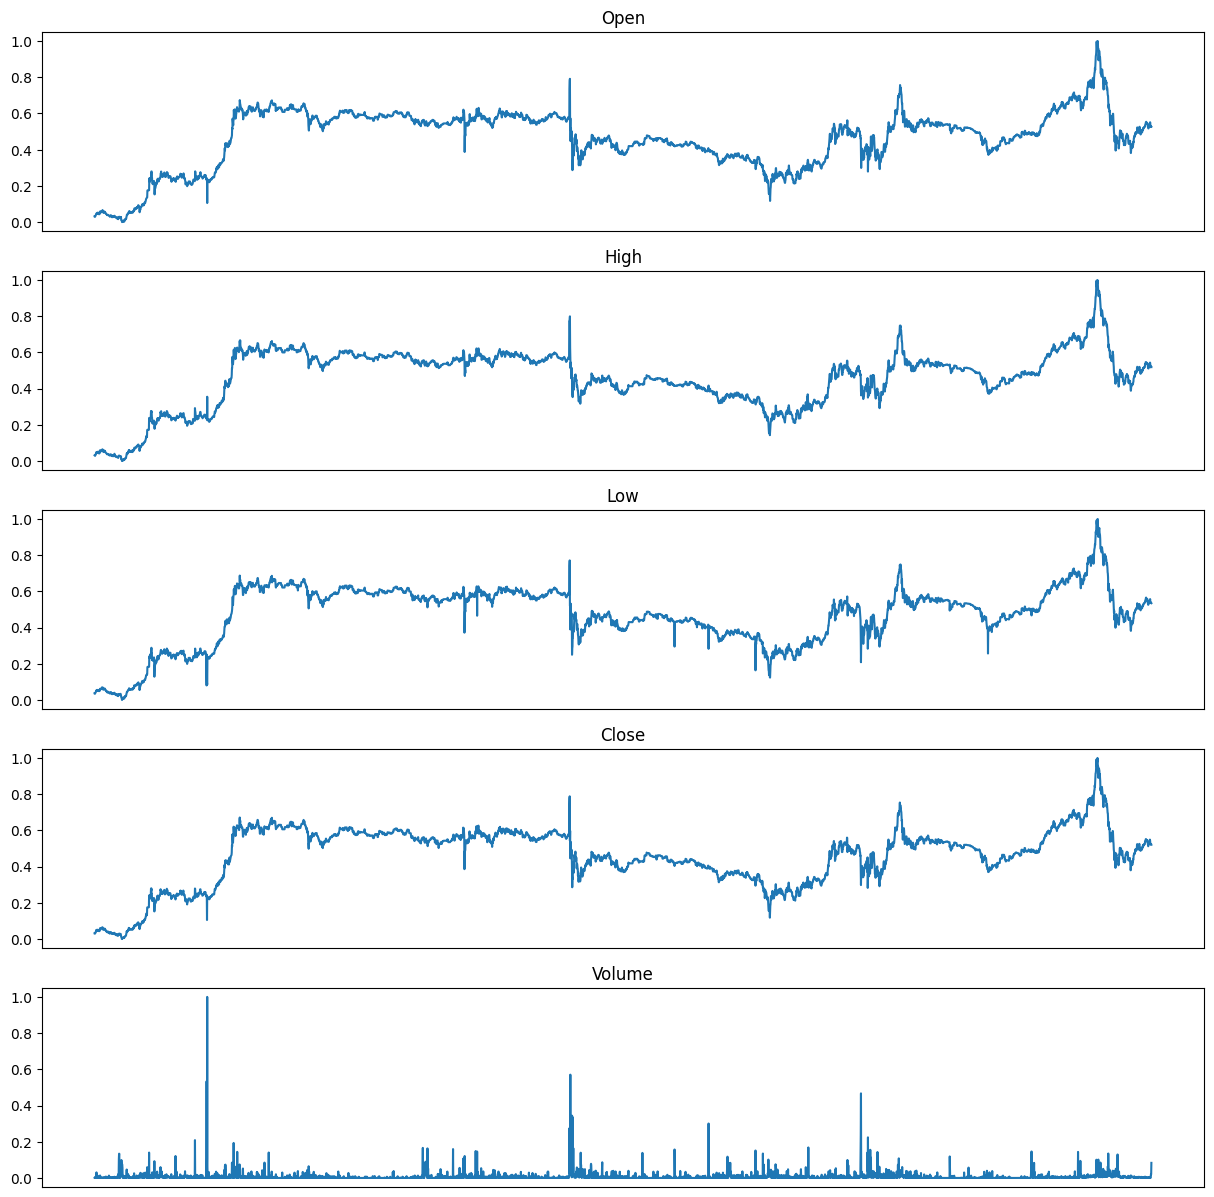

In [ ]:
df_scaled = pd.DataFrame(train_df[features], columns = train_df.columns, index = train_df.index)

plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(5)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)


In [ ]:
# Save processed data
np.save("../data/X.npy", X)
np.save("../data/Y.npy", Y)

# Save the fitted scaler, important for inverse transformation later
joblib.dump(scaler, "../models/scaler.pkl")

print("Processed training data and scaler saved successfully!")

Processed training data and scaler saved successfully!


## Data exploration of test data

In [54]:
test_csv_filename = "../data/test_deribit_data.csv"
test_df = pd.read_csv(test_csv_filename)

In [55]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(test_df.head())

# Display column names
print("\nColumn Names:")
print(test_df.columns)

# Check for missing values
print("\nMissing Values:")
print(test_df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", test_df.duplicated().sum())

# Display basic statistics
print("\nBasic Statistical Summary:")
print(test_df.describe())

# Check data types of each column
print("\nColumn Data Types:")
print(test_df.dtypes)

First 5 rows of the dataset:
       Timestamp     Open     High      Low    Close      Volume
0  1704999960000  46494.0  46494.0  46475.5  46475.5  125.481799
1  1705000020000  46481.0  46509.0  46481.0  46509.0  103.233781
2  1705000080000  46509.0  46555.5  46462.5  46466.5   57.461842
3  1705000140000  46464.5  46508.5  46464.5  46493.0   56.419540
4  1705000200000  46490.5  46490.5  46441.5  46477.0    8.825335

Column Names:
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Missing Values:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Number of Duplicate Rows: 0

Basic Statistical Summary:
          Timestamp          Open          High           Low        Close  \
count  5.001000e+03   5001.000000   5001.000000   5001.000000   5001.00000   
mean   1.705150e+12  43643.504099  43651.156769  43634.475605  43643.29784   
std    8.662852e+07   1443.965472   1446.100241   1441.449466   1443.09100  

In [56]:
# Convert timestamp from milliseconds to datetime
test_df["Timestamp"] = pd.to_datetime(test_df["Timestamp"], unit="ms")

# Save cleaned data
test_df.to_csv("../data/test_cleaned_data.csv", index=False)

# Display the first few rows
print(test_df.head())

            Timestamp     Open     High      Low    Close      Volume
0 2024-01-11 19:06:00  46494.0  46494.0  46475.5  46475.5  125.481799
1 2024-01-11 19:07:00  46481.0  46509.0  46481.0  46509.0  103.233781
2 2024-01-11 19:08:00  46509.0  46555.5  46462.5  46466.5   57.461842
3 2024-01-11 19:09:00  46464.5  46508.5  46464.5  46493.0   56.419540
4 2024-01-11 19:10:00  46490.5  46490.5  46441.5  46477.0    8.825335


In [57]:

# Load training data
test_df = pd.read_csv("../data/test_cleaned_data.csv")

# Set Timestamp as index 
test_df.set_index("Timestamp", inplace=True)

# sort using Date time index 
test_df.sort_index(inplace=True)

# Display the first few rows
print(test_df.head())

                        Open     High      Low    Close      Volume
Timestamp                                                          
2024-01-11 19:06:00  46494.0  46494.0  46475.5  46475.5  125.481799
2024-01-11 19:07:00  46481.0  46509.0  46481.0  46509.0  103.233781
2024-01-11 19:08:00  46509.0  46555.5  46462.5  46466.5   57.461842
2024-01-11 19:09:00  46464.5  46508.5  46464.5  46493.0   56.419540
2024-01-11 19:10:00  46490.5  46490.5  46441.5  46477.0    8.825335


In [58]:
# Load the saved scaler (to normalize test data)
scaler = joblib.load("../models/scaler.pkl")
test_df[features] = scaler.fit_transform(test_df[features])

# Convert to NumPy array
X_test = test_df[features].values
Y_test = test_df["Close"].values
Y_test = Y_test.reshape(-1,1)

print("Test data prepared successfully!")
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Test data prepared successfully!
X_test shape: (5001, 5)
Y_test shape: (5001, 1)


In [59]:

# Save processed data
np.save("../data/X_test.npy", X_test)
np.save("../data/Y_test.npy", Y_test)

print("Processed testing data and scaler saved successfully!")

Processed testing data and scaler saved successfully!
